In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import LeaveOneGroupOut


In [2]:
# Load the dataset
data = pd.read_csv('HR_data.csv', header=None)

# Drop the second column (index 1)
data = data.drop(columns=[0])
data

,1,2,3,4,5,6,7,8,9,10,11,12
0,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
1,77.96518644067797,78.0,3.3452903053436787,73.23,83.37,22924.945,round_3,phase3,1,1,1,D1_1
2,70.98109677419355,70.57,2.5178789984426624,67.12,78.22,21930.4,round_3,phase2,1,1,5,D1_1
3,73.37195945945946,73.36,3.2595686849505436,67.88,80.22,21647.085000000003,round_3,phase1,1,1,0,D1_1
4,78.91682242990655,77.88,4.0545949084335575,72.32,84.92,25258.905,round_2,phase3,1,1,1,D1_1
...,...,...,...,...,...,...,...,...,...,...,...,...
164,73.59453924914676,72.38,9.474555915931095,57.43,93.53,21482.985,round_4,phase2,14,0,8,D1_2
165,57.83989726027397,54.13,6.796646913571338,52.97,74.14,16825.739999999998,round_4,phase1,14,0,0,D1_2
166,64.23729452054795,65.195,3.589241064363635,58.97,72.63,18691.065000000002,round_1,phase3,14,0,1,D1_2
167,70.83431972789116,70.44,2.3911599238411947,66.65,76.07,20753.005,round_1,phase2,14,0,4,D1_2


In [3]:
# Assign column names
data.columns = ['HR Mean', 'HR Median', 'HR std', 'HR Min', 'HR Max', 'HR AUC', 
                'Round', 'Phase', 'Individual', 'Puzzler', 'Frustrated', 'Cohort']

# Convert 'Round' and 'Phase' to string type
data['Round'] = data['Round'].astype(str)
data['Phase'] = data['Phase'].astype(str)

# Filter out rows with non-numeric 'Round' and 'Phase' entries
data = data[data['Round'].str.contains(r'\d+') & data['Phase'].str.contains(r'\d+')]

# Convert 'Round' and 'Phase' back to integer type
data['Round'] = data['Round'].str.extract('(\d+)').astype(int)
data['Phase'] = data['Phase'].str.extract('(\d+)').astype(int)

# Convert categorical columns to numerical
data['Puzzler'] = data['Puzzler'].astype(int)
data['Cohort'] = data['Cohort'].astype('category').cat.codes

# Verify the conversion
print(data['Round'].dtype)
print(data['Phase'].dtype)
print(data['Round'].unique())
print(data['Phase'].unique())

data

int32
int32
[3 2 4 1]
[3 2 1]


C:\Users\rbraa\AppData\Local\Temp\ipykernel_4744\3106462179.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Round'] = data['Round'].str.extract('(\d+)').astype(int)
C:\Users\rbraa\AppData\Local\Temp\ipykernel_4744\3106462179.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Phase'] = data['Phase'].str.extract('(\d+)').astype(int)
C:\Users\rbraa\AppData\Local\Temp\ipykernel_4744\3106462179.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,HR Mean,HR Median,HR std,HR Min,HR Max,HR AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
1,77.96518644067797,78.0,3.3452903053436787,73.23,83.37,22924.945,3,3,1,1,1,0
2,70.98109677419355,70.57,2.5178789984426624,67.12,78.22,21930.4,3,2,1,1,5,0
3,73.37195945945946,73.36,3.2595686849505436,67.88,80.22,21647.085000000003,3,1,1,1,0,0
4,78.91682242990655,77.88,4.0545949084335575,72.32,84.92,25258.905,2,3,1,1,1,0
5,77.32222580645161,74.55,6.047603222640392,70.52,90.15,23890.565000000002,2,2,1,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
164,73.59453924914676,72.38,9.474555915931095,57.43,93.53,21482.985,4,2,14,0,8,1
165,57.83989726027397,54.13,6.796646913571338,52.97,74.14,16825.739999999998,4,1,14,0,0,1
166,64.23729452054795,65.195,3.589241064363635,58.97,72.63,18691.065000000002,1,3,14,0,1,1
167,70.83431972789116,70.44,2.3911599238411947,66.65,76.07,20753.005,1,2,14,0,4,1


In [34]:
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Suppress UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Assuming 'data' is already defined and contains your dataset
# Define features (X) and target variable (y)
X = data[['HR Mean', 'HR Median', 'HR std', 'HR Min', 'HR Max', 'HR AUC', 'Round', 'Phase', 'Puzzler', 'Cohort']]
y = data['Frustrated']
groups = data['Individual']  # Define groups based on 'Individual'

# Initialize Leave-One-Group-Out cross-validator
logo = LeaveOneGroupOut()

# Initialize lists to store evaluation scores
all_rf_mses = []

# Initialize list to store all individual MSEs
all_individual_rf_mses = []

# Iterate over 10 different random states
for random_state in range(0, 19):
    rf_mses = []

    # Iterate over each fold
    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Standardize the feature variables
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Initialize and train your model (Random Forest Classifier in this case)
        rf_model = RandomForestClassifier(n_estimators=20,
                                          max_depth=10,
                                          min_samples_split=10,
                                          min_samples_leaf=4,
                                          max_features='sqrt',
                                          random_state=random_state)
        rf_model.fit(X_train, y_train)

        # Evaluate the model
        y_pred_rf = rf_model.predict(X_test)

        # Calculate metrics
        rf_mse = mean_squared_error(y_test, y_pred_rf)

        # Append the individual MSE to the list
        all_individual_rf_mses.append(rf_mse)

        # Append the mean MSE for the current fold to calculate overall mean later
        rf_mses.append(rf_mse)

    # Calculate mean scores across all folds for the current random state
    rf_mean_mse = np.mean(rf_mses)
    all_rf_mses.append(rf_mean_mse)

# Calculate the overall mean and standard deviation across all random states
overall_mean_mse = np.mean(all_rf_mses)
overall_std_mse = np.std(all_rf_mses)

# Print summary
rf_summary = f"""
Model Evaluation Summary:
-------------------------
Mean MSE       : {overall_mean_mse:.4f}
Std MSE        : {overall_std_mse:.4f}
"""

print(rf_summary)


Model Evaluation Summary:
-------------------------
Mean MSE       : 4.8042
Std MSE        : 0.2215



In [20]:
# Print all individual MSEs
print(f"Total number of MSEs computed: {len(all_individual_rf_mses)}")
print("Individual MSEs:")
for i, mse in enumerate(all_individual_rf_mses):
    print(f"MSE {i+1}: {mse:.4f}")


Total number of MSEs computed: 280
Individual MSEs:
MSE 1: 4.5833
MSE 2: 0.6667
MSE 3: 2.0000
MSE 4: 5.5833
MSE 5: 2.3333
MSE 6: 10.5000
MSE 7: 1.7500
MSE 8: 2.7500
MSE 9: 4.1667
MSE 10: 3.1667
MSE 11: 10.0000
MSE 12: 9.5000
MSE 13: 4.4167
MSE 14: 9.9167
MSE 15: 3.0833
MSE 16: 1.0000
MSE 17: 2.5000
MSE 18: 7.0833
MSE 19: 1.8333
MSE 20: 8.8333
MSE 21: 5.0000
MSE 22: 3.7500
MSE 23: 5.7500
MSE 24: 4.2500
MSE 25: 6.9167
MSE 26: 9.0833
MSE 27: 2.4167
MSE 28: 9.9167
MSE 29: 3.2500
MSE 30: 3.9167
MSE 31: 2.2500
MSE 32: 6.7500
MSE 33: 0.6667
MSE 34: 9.4167
MSE 35: 4.0000
MSE 36: 2.9167
MSE 37: 3.8333
MSE 38: 3.4167
MSE 39: 7.2500
MSE 40: 6.1667
MSE 41: 3.4167
MSE 42: 9.9167
MSE 43: 3.3333
MSE 44: 1.0833
MSE 45: 2.2500
MSE 46: 5.8333
MSE 47: 2.8333
MSE 48: 11.7500
MSE 49: 2.8333
MSE 50: 4.0833
MSE 51: 3.0000
MSE 52: 3.2500
MSE 53: 7.5000
MSE 54: 8.7500
MSE 55: 3.5000
MSE 56: 9.5833
MSE 57: 5.7500
MSE 58: 2.0833
MSE 59: 2.3333
MSE 60: 6.0833
MSE 61: 3.3333
MSE 62: 9.2500
MSE 63: 1.4167
MSE 64: 4

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Define features (X) and target variable (y)
X = data[['HR Mean', 'HR Median', 'HR std', 'HR Min', 'HR Max', 'HR AUC', 'Round', 'Phase', 'Puzzler', 'Cohort']]
y = data['Frustrated']
groups = data['Individual']  # Define groups based on 'Individual'

# Initialize Leave-One-Group-Out cross-validator
logo = LeaveOneGroupOut()

# Define the extended parameter grid for grid search
param_grid = {
    'n_estimators': [20, 50, 100],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=10)

# Define the custom scoring function for MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Initialize GridSearchCV with Leave-One-Group-Out cross-validator for MSE
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=logo, scoring=mse_scorer, n_jobs=-1)

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the grid search to the data
grid_search.fit(X_scaled, y, groups=groups)

# Get the best parameters and best score for MSE
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negate because we used greater_is_better=False

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_score)


Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (64, 16), 'learning_rate': 'constant', 'solver': 'adam'}
Best Accuracy: 0.22619047619047622


C:\Users\rbraa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
from sklearn.preprocessing import LabelEncoder

# Suppress UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Assuming 'data' is already defined and contains your dataset
# Define features (X) and target variable (y)
X = data[['HR Mean', 'HR Median', 'HR std', 'HR Min', 'HR Max', 'HR AUC', 'Round', 'Phase', 'Puzzler', 'Cohort']]
y = data['Frustrated']
groups = data['Individual']  # Define groups based on 'Individual'

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical labels to numeric values
y_encoded = label_encoder.fit_transform(y)

# Initialize Leave-One-Group-Out cross-validator
logo = LeaveOneGroupOut()

# Initialize lists to store evaluation scores across different random states
ann_mses = []
all_individual_ann_mses = []  # List to store all individual MSEs

# Define the number of random states
# num_random_states = 

# Iterate over each random state
for random_state in range(20, 39):
    # Initialize list to store evaluation scores for the current random state
    ann_mses_rs = []

    # Iterate over each fold using Leave-One-Group-Out
    for train_index, test_index in logo.split(X, y_encoded, groups):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]

        # Standardize the feature variables
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Initialize and train your model (MLPClassifier in this case)
        mlp_model = MLPClassifier(hidden_layer_sizes=(64, 16), activation='relu', solver='sgd',
                                  alpha=0.0001, learning_rate='adaptive', random_state=random_state, max_iter=2000)
        mlp_model.fit(X_train, y_train)

        # Evaluate the model
        y_pred_mlp = mlp_model.predict(X_test)

        # Calculate mean squared error (MSE)
        ann_mse = mean_squared_error(y_test, y_pred_mlp)

        # Append the individual MSE to the list
        all_individual_ann_mses.append(ann_mse)

        # Append MSE for the current fold
        ann_mses_rs.append(ann_mse)

    # Calculate mean MSE across all folds for the current random state
    ann_mean_mse_rs = np.mean(ann_mses_rs)
    ann_mses.append(ann_mean_mse_rs)

# Calculate mean scores across all random states
ann_mean_mse = np.mean(ann_mses)

# Print summary
ann_summary = f"""
Model Evaluation Summary:
-------------------------
Mean MSE across {20} random states: {ann_mean_mse:.4f}
"""
print(ann_summary)


C:\Users\rbraa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rbraa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rbraa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rbraa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the 


Model Evaluation Summary:
-------------------------
Mean MSE across 20 random states: 4.7870



C:\Users\rbraa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
# Print all individual MSEs
print(f"Total number of MSEs computed: {len(all_individual_ann_mses)}")
print("Individual MSEs:")
for i, mse in enumerate(all_individual_ann_mses):
    print(f"MSE {i+1}: {mse:.4f}")


Total number of MSEs computed: 280
Individual MSEs:
MSE 1: 4.6667
MSE 2: 2.7500
MSE 3: 2.3333
MSE 4: 7.1667
MSE 5: 3.2500
MSE 6: 10.0833
MSE 7: 2.6667
MSE 8: 3.2500
MSE 9: 5.4167
MSE 10: 2.8333
MSE 11: 5.7500
MSE 12: 6.1667
MSE 13: 3.6667
MSE 14: 8.7500
MSE 15: 3.7500
MSE 16: 1.9167
MSE 17: 2.2500
MSE 18: 8.6667
MSE 19: 2.6667
MSE 20: 9.4167
MSE 21: 2.1667
MSE 22: 2.5000
MSE 23: 2.5833
MSE 24: 3.0000
MSE 25: 5.9167
MSE 26: 8.0833
MSE 27: 2.1667
MSE 28: 8.7500
MSE 29: 5.5833
MSE 30: 2.9167
MSE 31: 3.0000
MSE 32: 7.0833
MSE 33: 2.0000
MSE 34: 8.1667
MSE 35: 3.0000
MSE 36: 2.5000
MSE 37: 2.5833
MSE 38: 3.1667
MSE 39: 7.0833
MSE 40: 6.7500
MSE 41: 2.8333
MSE 42: 8.7500
MSE 43: 5.0833
MSE 44: 1.9167
MSE 45: 2.3333
MSE 46: 7.2500
MSE 47: 4.6667
MSE 48: 9.4167
MSE 49: 2.3333
MSE 50: 2.5000
MSE 51: 6.6667
MSE 52: 3.5000
MSE 53: 5.7500
MSE 54: 8.4167
MSE 55: 4.1667
MSE 56: 8.7500
MSE 57: 3.1667
MSE 58: 2.2500
MSE 59: 2.6667
MSE 60: 7.4167
MSE 61: 2.5000
MSE 62: 11.0000
MSE 63: 3.1667
MSE 64: 4.

In [45]:
# Define features (X) and target variable (y)
X = data[['HR Mean', 'HR Median', 'HR std', 'HR Min', 'HR Max', 'HR AUC', 'Round', 'Phase', 'Puzzler', 'Cohort']]
y = data['Frustrated']
groups = data['Individual']  # Define groups based on 'Individual'

# Initialize Leave-One-Group-Out cross-validator
logo = LeaveOneGroupOut()

# Define the parameter grid for MLPClassifier
param_grid = {
    'hidden_layer_sizes': [(16, 8), (32, 16), (64, 16)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Initialize the MLPClassifier
mlp_model = MLPClassifier(max_iter=100, random_state=30)

# Define the custom scoring function for MSE
def mse_scorer(estimator, X, y_true):
    y_pred = estimator.predict(X)
    mse = mean_squared_error(y_true, y_pred)
    return mse

# Initialize GridSearchCV with Leave-One-Group-Out cross-validator for MSE
grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=logo, scoring=mse_scorer, n_jobs=-1)

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the grid search to the data
grid_search.fit(X_scaled, y, groups=groups)

# Get the best parameters and best score for MSE
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_score)


Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (16, 8), 'learning_rate': 'constant', 'solver': 'adam'}
Best Mean Squared Error: nan


C:\Users\rbraa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\rbraa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [47]:
from sklearn.dummy import DummyClassifier

# Suppress UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Assuming 'data' is already defined and contains your dataset
# Define features (X) and target variable (y)
X = data[['HR Mean', 'HR Median', 'HR std', 'HR Min', 'HR Max', 'HR AUC', 'Round', 'Phase', 'Puzzler', 'Cohort']]
y = data['Frustrated']
groups = data['Individual']  # Define groups based on 'Individual'

# Ensure y is numeric (if it's not already)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Initialize Leave-One-Group-Out cross-validator based on 'Individual'
logo = LeaveOneGroupOut()

# Initialize lists to store evaluation scores
baseline_mse_scores = []
all_individual_baseline_mses = []  # List to store all individual MSEs

# Perform cross-validation predictions and evaluate MSE for each fold
for random_state in range(40, 59):
    # Initialize list to store evaluation scores for the current random state
    baseline_mses_rs = []

    # Iterate over each fold using Leave-One-Group-Out
    for train_index, test_index in logo.split(X, y_encoded, groups):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]

        # Create a dummy classifier that always predicts the most frequent class
        baseline_model = DummyClassifier(strategy='most_frequent')
        
        # Fit the baseline model
        baseline_model.fit(X_train, y_train)
        
        # Predict using the baseline model
        baseline_predictions = baseline_model.predict(X_test)
        
        # Calculate MSE for this fold
        mse_fold = mean_squared_error(y_test, baseline_predictions)
        
        # Append the individual MSE to the list
        all_individual_baseline_mses.append(mse_fold)
        
        # Append MSE for the current fold
        baseline_mses_rs.append(mse_fold)

    # Calculate mean MSE across all folds for the current random state
    baseline_mean_mse_rs = np.mean(baseline_mses_rs)
    baseline_mse_scores.append(baseline_mean_mse_rs)

# Convert scores to numpy array for easier manipulation
baseline_mse_scores = np.array(baseline_mse_scores)

# Calculate mean MSE across all random states
baseline_mean_mse = np.mean(baseline_mse_scores)
print(f"\nOverall Baseline Model Mean MSE: {baseline_mean_mse:.4f}")




Overall Baseline Model Mean MSE: 5.3512


In [48]:
# Print mean MSE scores across all random states
print(f"Baseline Model Mean MSE across {20} random states:")
for i, mse_score in enumerate(baseline_mse_scores):
    print(f"Random State {i}: {mse_score:.4f}")

    
# Print all individual MSEs
print(f"\nTotal number of MSEs computed: {len(all_individual_baseline_mses)}")
print("Individual MSEs:")
for i, mse in enumerate(all_individual_baseline_mses):
    print(f"MSE {i+1}: {mse:.4f}")

Baseline Model Mean MSE across 20 random states:
Random State 0: 5.3512
Random State 1: 5.3512
Random State 2: 5.3512
Random State 3: 5.3512
Random State 4: 5.3512
Random State 5: 5.3512
Random State 6: 5.3512
Random State 7: 5.3512
Random State 8: 5.3512
Random State 9: 5.3512
Random State 10: 5.3512
Random State 11: 5.3512
Random State 12: 5.3512
Random State 13: 5.3512
Random State 14: 5.3512
Random State 15: 5.3512
Random State 16: 5.3512
Random State 17: 5.3512
Random State 18: 5.3512

Total number of MSEs computed: 266
Individual MSEs:
MSE 1: 3.9167
MSE 2: 2.0000
MSE 3: 1.8333
MSE 4: 6.4167
MSE 5: 0.4167
MSE 6: 8.8333
MSE 7: 4.5000
MSE 8: 4.4167
MSE 9: 6.0833
MSE 10: 5.2500
MSE 11: 10.7500
MSE 12: 8.5833
MSE 13: 3.1667
MSE 14: 8.7500
MSE 15: 3.9167
MSE 16: 2.0000
MSE 17: 1.8333
MSE 18: 6.4167
MSE 19: 0.4167
MSE 20: 8.8333
MSE 21: 4.5000
MSE 22: 4.4167
MSE 23: 6.0833
MSE 24: 5.2500
MSE 25: 10.7500
MSE 26: 8.5833
MSE 27: 3.1667
MSE 28: 8.7500
MSE 29: 3.9167
MSE 30: 2.0000
MSE 31: 1

# Statistical evalutation

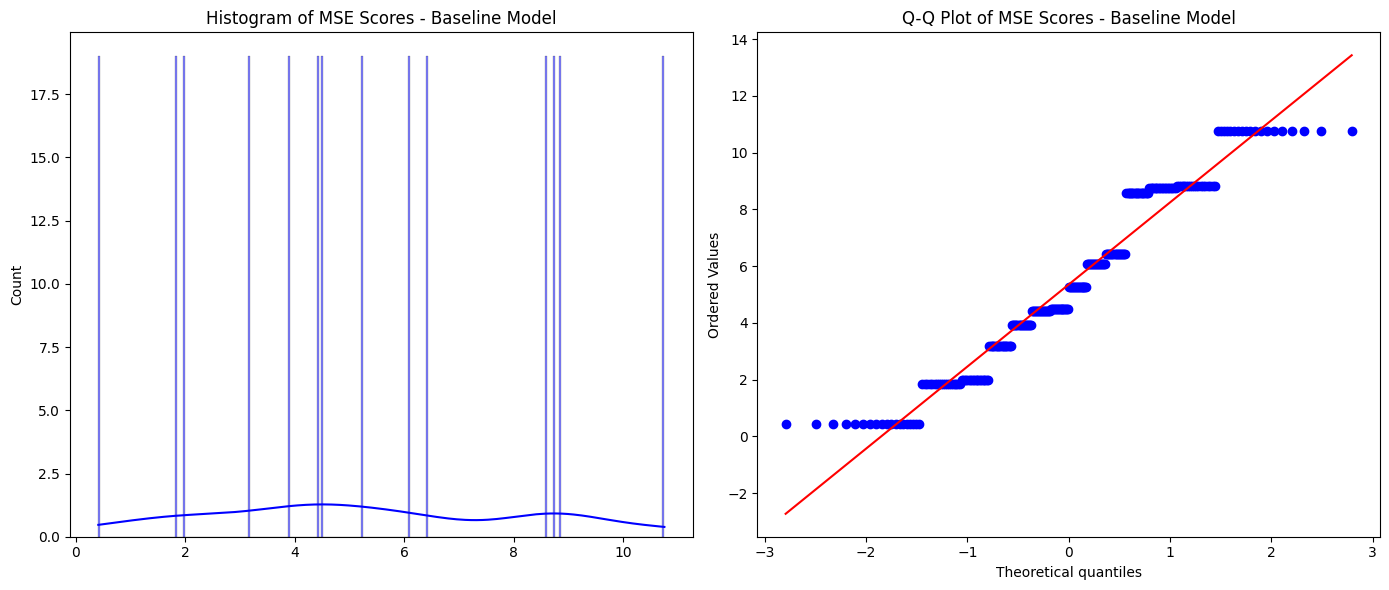

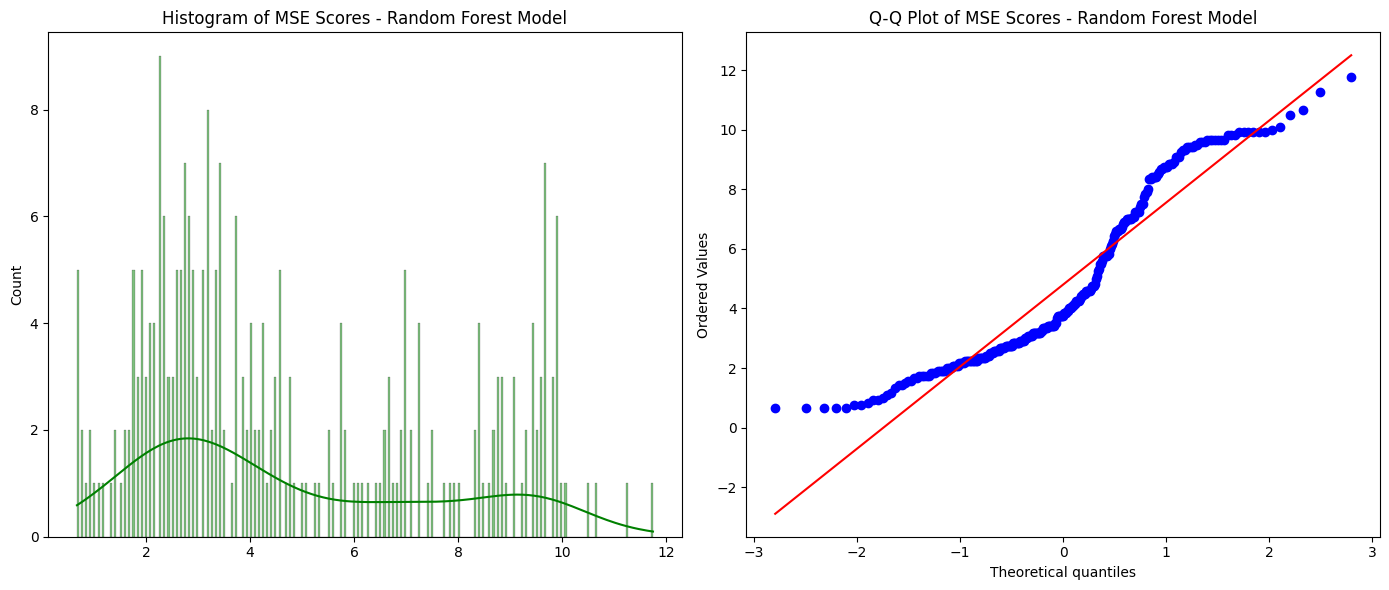

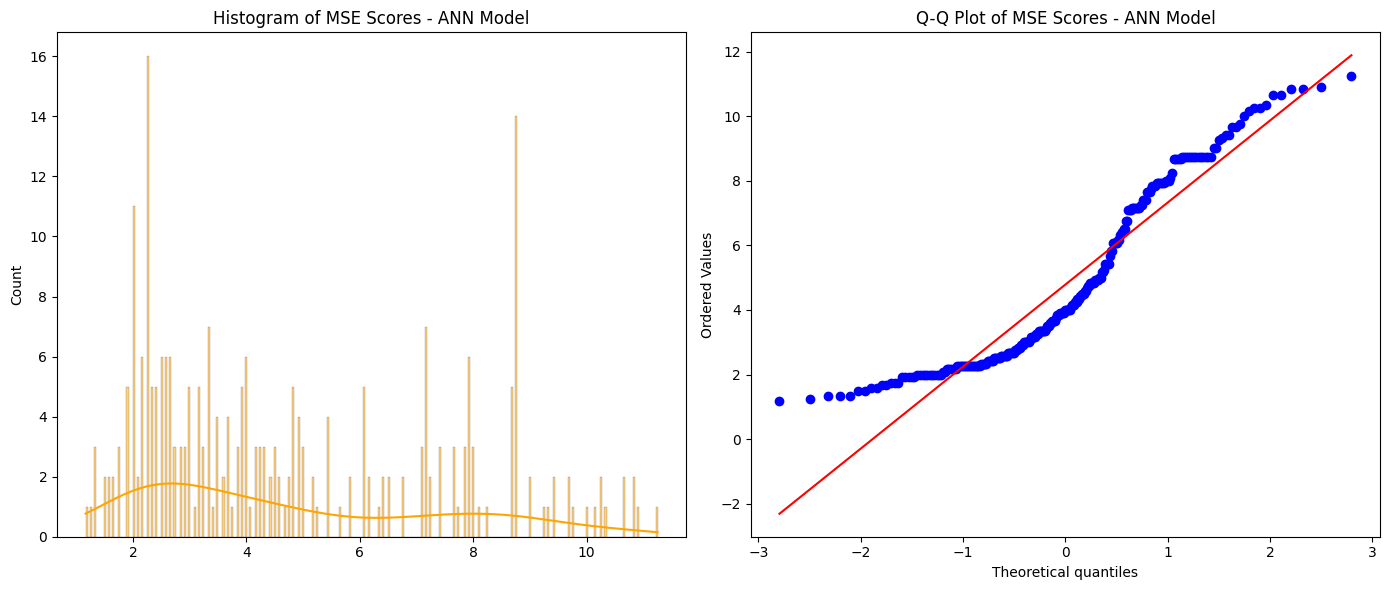

In [52]:
## First step is to analyse whether the mse for each fold is normally distributed:

# Log-transform the data
log_all_individual_baseline_mses = np.log(all_individual_baseline_mses)
log_all_individual_rf_mses = np.log(all_individual_rf_mses)
log_all_individual_ann_mses = np.log(all_individual_ann_mses)

# A function to plot histograms and Q-Q plots
def plot_distributions(data, model_name, color):
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True, bins=280, color=color)
    plt.title(f'Histogram of MSE Scores - {model_name}')

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of MSE Scores - {model_name}')

    plt.tight_layout()
    plt.show()

# Define colors for each model
baseline_color = 'blue'
rf_color = 'green'
ann_color = 'orange'

# Plot distributions for each model with respective colors
plot_distributions(all_individual_baseline_mses, 'Baseline Model', baseline_color)
plot_distributions(all_individual_rf_mses, 'Random Forest Model', rf_color)
plot_distributions(all_individual_ann_mses, 'ANN Model', ann_color)


In [50]:
# It looks like none of the models follow a normal distribution, but to be completely sure, I perfomed a Shapiro-Wilk test.
from scipy.stats import shapiro

for model_name, scores in {'Random Forest': all_individual_rf_mses, 
                           'ANN': all_individual_ann_mses, 
                           'Baseline': all_individual_baseline_mses}.items():
    stat, p_value = shapiro(scores)
    print(f'{model_name} Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}')

# P-value is below 0.05, so we reject the null-hypothesis that the data is normally distributed


Random Forest Shapiro-Wilk Test: Statistic=0.9074298739433289, p-value=9.716537470449982e-12
ANN Shapiro-Wilk Test: Statistic=0.904464066028595, p-value=5.852163371955488e-12
Baseline Shapiro-Wilk Test: Statistic=0.9442031383514404, p-value=1.6122353230230146e-08


In [110]:
from scipy.stats import kruskal

# Performing Kruskal-Wallis test to check for difference in distribution

h_statistic, p_value = kruskal(all_individual_rf_mses, all_individual_ann_mses, all_individual_baseline_mses)

print(f"Kruskal-Wallis H-statistic: {h_statistic:.4f}")
print(f"P-value: {p_value:.4f}")


Kruskal-Wallis H-statistic: 7.4416
P-value: 0.0242


In [79]:
# Adjust alpha for multiple comparisons using Bonferroni correction

# Perform Wilcoxon tests

from scipy.stats import wilcoxon

# Perform pairwise Wilcoxon  tests
_, p_baseline_rf = wilcoxon(all_individual_baseline_mses, all_individual_rf_mses)
_, p_baseline_ann = wilcoxon(all_individual_baseline_mses, all_individual_ann_mses)
_, p_rf_ann = wilcoxon(all_individual_rf_mses, all_individual_ann_mses)

# Number of comparisons
m = 3

p_values = [p_baseline_rf, p_baseline_ann, p_rf_ann]

# Adjusted significance level
alpha_adjusted = 0.05 / m

print(f"P-values: {p_values}")
print(f"Adjusted significance level: {alpha_adjusted}")

# Interpret the results
for i, p_val in enumerate(p_values):
    if p_val < alpha_adjusted:
        print(f"Pairwise comparison {i+1} is statistically significant.")
    else:
        print(f"Pairwise comparison {i+1} is not statistically significant.")

P-values: [5.2098832167451035e-06, 0.00024725247350617535, 0.8839847798055196]
Adjusted significance level: 0.016666666666666666
Pairwise comparison 1 is statistically significant.
Pairwise comparison 2 is statistically significant.
Pairwise comparison 3 is not statistically significant.


C:\Users\rbraa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\rbraa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\rbraa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


 RF mean MSE: 4.678571428571429
 ANN mean MSE: 4.786967418546365
Baseline mean MSE: 5.351190476190477


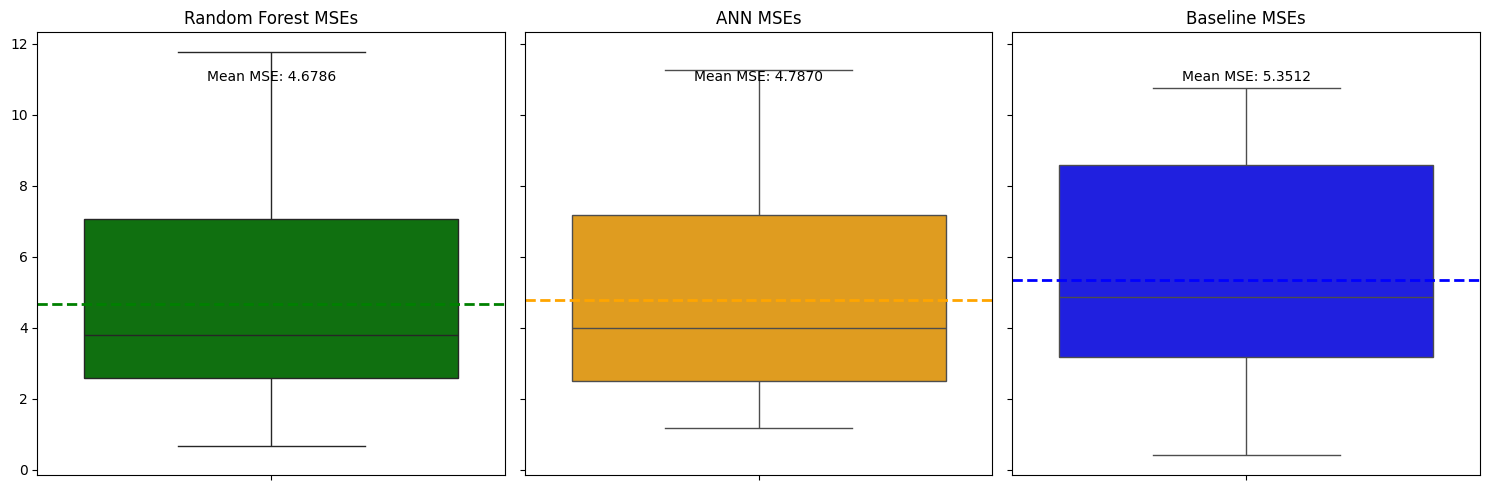

In [109]:
# Boxplots of MSE means

# Create a figure and axis (subplot) for the three plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot each boxplot on its respective axis
sns.boxplot(y=all_individual_rf_mses, color='green', ax=axes[0])
sns.boxplot(y=all_individual_ann_mses, color='orange', ax=axes[1])
sns.boxplot(y=all_individual_baseline_mses, color='blue', ax=axes[2])

# Set labels and titles for each subplot
axes[0].set_title('Random Forest MSEs')
axes[1].set_title('ANN MSEs')
axes[2].set_title('Baseline MSEs')

# Add mean MSE lines
axes[0].axhline(rf_mean_mse, color='green', linestyle='--', linewidth=2)
axes[1].axhline(ann_mean_mse, color='orange', linestyle='--', linewidth=2)
axes[2].axhline(baseline_mean_mse, color='blue', linestyle='--', linewidth=2)

axes[0].text(0.5, 0.9, f'Mean MSE: {rf_mean_mse:.4f}', ha='center', va='center', transform=axes[0].transAxes)
axes[1].text(0.5, 0.9, f'Mean MSE: {ann_mean_mse:.4f}', ha='center', va='center', transform=axes[1].transAxes)
axes[2].text(0.5, 0.9, f'Mean MSE: {baseline_mean_mse:.4f}', ha='center', va='center', transform=axes[2].transAxes)

print(f' RF mean MSE: {rf_mean_mse}')
print(f' ANN mean MSE: {ann_mean_mse}')
print(f'Baseline mean MSE: {baseline_mean_mse}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

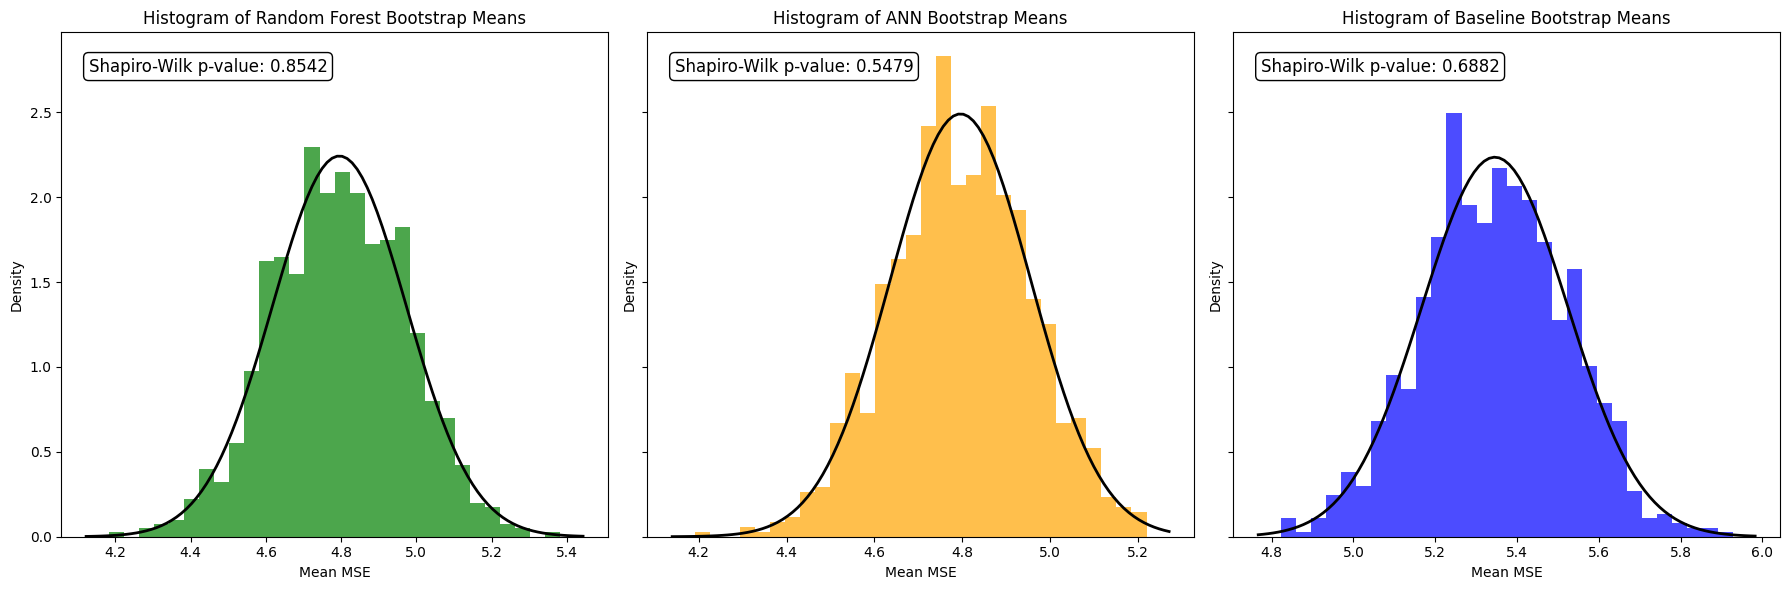

In [106]:
def bootstrap_confidence_interval(data, num_bootstrap_samples=1000, confidence_level=0.95):
    # Generate bootstrap samples
    bootstrap_samples = np.random.choice(data, size=(num_bootstrap_samples, len(data)), replace=True)
    
    # Calculate the mean for each bootstrap sample
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    
    # Calculate the confidence interval
    lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    
    # Calculate the bootstrap mean
    bootstrap_mean = np.mean(bootstrap_means)
    
    return bootstrap_mean, lower_bound, upper_bound, bootstrap_means

baseline_mean, baseline_lower, baseline_upper, baseline_bootstrap_means = bootstrap_confidence_interval(all_individual_baseline_mses)
rf_mean, rf_lower, rf_upper, rf_bootstrap_means = bootstrap_confidence_interval(all_individual_rf_mses)
ann_mean, ann_lower, ann_upper, ann_bootstrap_means = bootstrap_confidence_interval(all_individual_ann_mses)

# Plot histograms of bootstrap means
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

models = ['Random Forest', 'ANN', 'Baseline']
bootstrap_means = [rf_bootstrap_means, ann_bootstrap_means, baseline_bootstrap_means]
colors = ['green', 'orange', 'blue']

for ax, model, means, color in zip(axes, models, bootstrap_means, colors):
    ax.hist(means, bins=30, color=color, alpha=0.7, density=True)
    
    # Overlay normal distribution curve
    mu, std = np.mean(means), np.std(means)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    ax.plot(x, p, 'k', linewidth=2)
    
    # Perform Shapiro-Wilk test
    shapiro_stat, shapiro_p_value = stats.shapiro(means)
    
    # Add Shapiro-Wilk test p-value to plot
    ax.text(0.05, 0.95, f'Shapiro-Wilk p-value: {shapiro_p_value:.4f}', transform=ax.transAxes, 
            fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))
    
    ax.set_title(f'Histogram of {model} Bootstrap Means')
    ax.set_xlabel('Mean MSE')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()


Random Forest Model Mean MSE: 4.8047, 95% CI: (4.4542, 5.1582)
ANN Model Mean MSE: 4.7909, 95% CI: (4.4536, 5.1297)
Baseline Model Mean MSE: 5.3609, 95% CI: (5.0153, 5.7128)


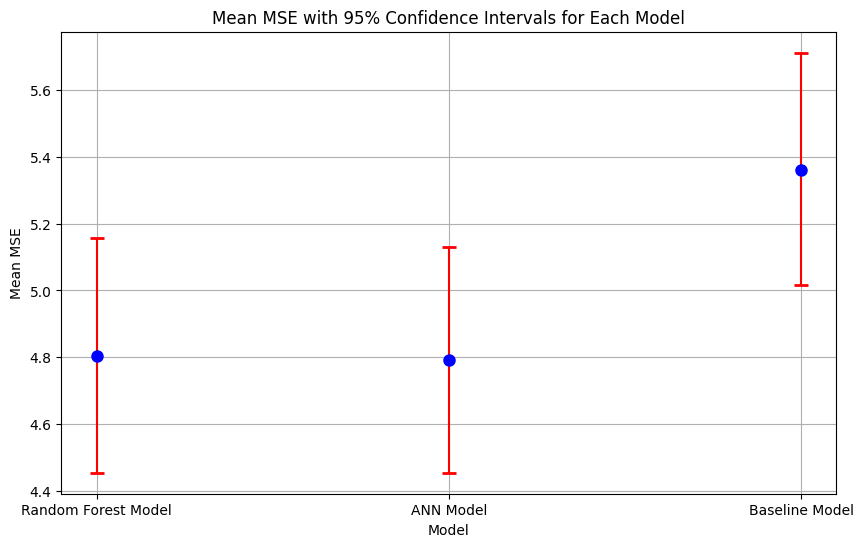

In [108]:
def bootstrap_confidence_interval(data, num_bootstrap_samples=1000, confidence_level=0.95):
    # Generate bootstrap samples
    bootstrap_samples = np.random.choice(data, size=(num_bootstrap_samples, len(data)), replace=True)
    
    # Calculate the mean for each bootstrap sample
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    
    # Calculate the confidence interval
    lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    
    # Calculate the bootstrap mean
    bootstrap_mean = np.mean(bootstrap_means)
    
    return bootstrap_mean, lower_bound, upper_bound

# Calculate confidence intervals for each model's MSE
baseline_bootstrap_mean, baseline_bootstrap_lower, baseline_bootstrap_upper = bootstrap_confidence_interval(all_individual_baseline_mses)
rf_bootstrap_mean, rf_bootstrap_lower, rf_bootstrap_upper = bootstrap_confidence_interval(all_individual_rf_mses)
ann_bootstrap_mean, ann_bootstrap_lower, ann_bootstrap_upper = bootstrap_confidence_interval(all_individual_ann_mses)


print(f'Random Forest Model Mean MSE: {rf_bootstrap_mean:.4f}, 95% CI: ({rf_bootstrap_lower:.4f}, {rf_bootstrap_upper:.4f})')
print(f'ANN Model Mean MSE: {ann_bootstrap_mean:.4f}, 95% CI: ({ann_bootstrap_lower:.4f}, {ann_bootstrap_upper:.4f})')
print(f'Baseline Model Mean MSE: {baseline_bootstrap_mean:.4f}, 95% CI: ({baseline_bootstrap_lower:.4f}, {baseline_bootstrap_upper:.4f})')


# Plotting the confidence intervals
models = ['Random Forest Model', 'ANN Model', 'Baseline Model']
means = [rf_bootstrap_mean, ann_bootstrap_mean, baseline_bootstrap_mean]
lower_bounds = [rf_bootstrap_lower, ann_bootstrap_lower, baseline_bootstrap_lower]
upper_bounds = [rf_bootstrap_upper, ann_bootstrap_upper, baseline_bootstrap_upper]

plt.figure(figsize=(10, 6))
plt.errorbar(models, means, yerr=[np.array(means) - np.array(lower_bounds), np.array(upper_bounds) - np.array(means)], 
             fmt='o', capsize=5, capthick=2, ecolor='red', color='blue', markersize=8)
plt.title('Mean MSE with 95% Confidence Intervals for Each Model')
plt.xlabel('Model')
plt.ylabel('Mean MSE')
plt.grid(True)
plt.show()

In [78]:
rf_std = np.std(all_individual_rf_mses)
ann_std = np.std(all_individual_ann_mses)
baseline_std = np.std(all_individual_baseline_mses)

rf_median = np.median(all_individual_rf_mses)
ann_median = np.median(all_individual_ann_mses)
baseline_median = np.median(all_individual_baseline_mses)

print(f"Baseline MSE Standard Deviation: {baseline_std:.4f}")
print(f"RF MSE Standard Deviation: {rf_std:.4f}")
print(f"ANN MSE Standard Deviation: {ann_std:.4f}")
print('---------------------')
print(f'RF mean MSE: {rf_mean_mse:.4f}')
print(f'ANN mean MSE: {ann_mean_mse:.4f}')
print(f'Baseline mean MSE: {baseline_mean_mse:.4f}')
print('---------------------')
print(f'RF median MSE: {rf_median:.4f}')
print(f'ANN median MSE: {ann_median:.4f}')
print(f'Baseline median MSE: {baseline_median:.4f}')



Baseline MSE Standard Deviation: 2.9440
RF MSE Standard Deviation: 2.8590
ANN MSE Standard Deviation: 2.6424
---------------------
RF mean MSE: 4.6786
ANN mean MSE: 4.7870
Baseline mean MSE: 5.3512
---------------------
RF median MSE: 3.7917
ANN median MSE: 4.0000
Baseline median MSE: 4.8750
